#### Set-1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
company=pd.read_excel('company.xlsx')
company

,Name of company,Measure X
0,Allied Signal,0.2423
1,Bankers Trust,0.2553
2,General Mills,0.2541
3,ITT Industries,0.2414
4,J.P.Morgan & Co.,0.2962
5,Lehman Brothers,0.2825
6,Marriott,0.2581
7,MCI,0.2439
8,Merrill Lynch,0.4026
9,Microsoft,0.3295


<AxesSubplot:>

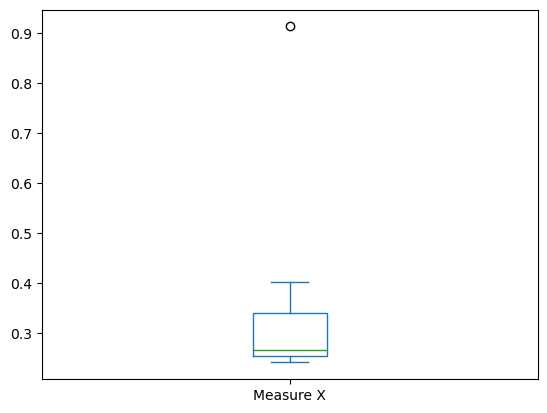

In [5]:
company['Measure X'].plot(kind='box')

<AxesSubplot:>

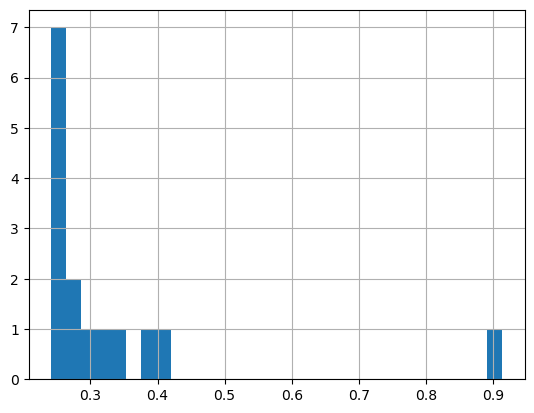

In [6]:
company['Measure X'].hist(bins=30)

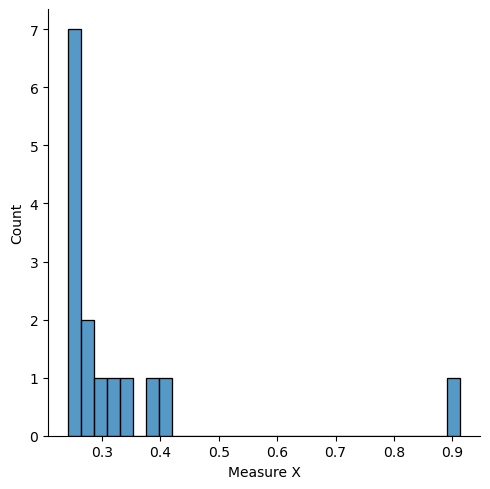

In [7]:
sns.displot(company['Measure X'],bins=30)

In [8]:
company['Measure X'].agg(['mean', 'std','var'])

mean    0.332713
std     0.169454
var     0.028715
Name: Measure X, dtype: float64

#### Set2

1.	The time required for servicing transmissions is normally distributed with  = 45 minutes and  = 8 minutes. The service manager plans to have work begin on the transmission of a customer’s car 10 minutes after the car is dropped off and the customer is told that the car will be ready within 1 hour from drop-off. What is the probability that the service manager cannot meet his commitment?  

In [9]:
from scipy import stats

In [10]:
1-stats.norm.cdf(50,45,8)

0.26598552904870054

2.The current age (in years) of 400 clerical employees at an insurance claims processing center is normally distributed with mean  = 38 and Standard deviation  =6. For each statement below, please specify True/False. If false, briefly explain why.

A. More employees at the processing center are older than 44 than between 38 and 44.

In [11]:
#employees greater than 44 years age
1-stats.norm.cdf(44,38,6)

0.15865525393145707

In [12]:
#employees between age 38 and 44
stats.norm.cdf(44,38,6)-stats.norm.cdf(38,38,6)

0.3413447460685429

B. A training program for employees under the age of 30 at the center would be expected to attract about 36 employees.

In [13]:
#employees under 30 years of age
stats.norm.cdf(30,38,6)

0.09121121972586788

In [14]:
#employees out of 400 expected to attend the training
400*0.09121121972586788

36.484487890347154

4.Let X ~ N(100, 20^2). Find two values, a and b, symmetric about the mean, such that the probability of the random variable taking a value between them is 0.99.

In [15]:
stats.norm.interval(0.99,100,20)

(48.48341392902199, 151.516586070978)

5.Consider a company that has two different divisions. The annual profits from the two divisions are independent and have distributions Profit1 ~ N(5, 3^2) and Profit2 ~ N(7, 4^2) respectively. Both the profits are in𝑀𝑖𝑙𝑙𝑖𝑜𝑛.𝐴𝑛𝑠𝑤𝑒𝑟𝑡ℎ𝑒𝑓𝑜𝑙𝑙𝑜𝑤𝑖𝑛𝑔𝑞𝑢𝑒𝑠𝑡𝑖𝑜𝑛𝑠𝑎𝑏𝑜𝑢𝑡𝑡ℎ𝑒𝑡𝑜𝑡𝑎𝑙𝑝𝑟𝑜𝑓𝑖𝑡𝑜𝑓𝑡ℎ𝑒𝑐𝑜𝑚𝑝𝑎𝑛𝑦𝑖𝑛𝑅𝑢𝑝𝑒𝑒𝑠.𝐴𝑠𝑠𝑢𝑚𝑒𝑡ℎ𝑎𝑡
1 usd = Rs. 45

A. Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.

In [16]:
# Mean profits from two different divisions of a company = Mean1 + Mean2
Mean = 5+7
print('Mean Profit is Rs', Mean*45,'Million')

Mean Profit is Rs 540 Million


In [17]:
# Variance of profits from two different divisions of a company = SD^2 = SD1^2 + SD2^2
SD = np.sqrt((9)+(16))
print('Standard Deviation is Rs', SD*45, 'Million')

Standard Deviation is Rs 225.0 Million


In [18]:
# A. Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.
print('Range is Rs',(stats.norm.interval(0.95,540,225)),'in Millions')

Range is Rs (99.00810347848784, 980.9918965215122) in Millions


B. Specify the 5th percentile of profit (in Rupees) for the company

In [20]:
# To compute 5th Percentile, we use the formula X=μ + Zσ; wherein from z table, 5 percentile = -1.645
X= 540+(-1.645)*(225)
print('5th percentile of profit (in Million Rupees) is',np.round(X,))

5th percentile of profit (in Million Rupees) is 170.0


C. Which of the two divisions has a larger probability of making a loss in a given year?

In [21]:
# Probability of Division 1 making a loss P(X<0)
stats.norm.cdf(0,5,3)

0.0477903522728147

In [22]:
# Probability of Division 2 making a loss P(X<0)
stats.norm.cdf(0,7,4)

0.040059156863817086

#### Set-3

Q5. In January 2005, a company that monitors Internet traffic (WebSideStory) reported that its sampling revealed that the Mozilla Firefox browser launched in 2004 had grabbed a 4.6% share of the market.

I. If the sample were based on 2,000 users, could Microsoft conclude that Mozilla has a less than 5% share of the market?

II. WebSideStory claims that its sample includes all the daily Internet users. If that’s the case, then can Microsoft conclude that Mozilla has a less than 5% share of the market?

Null Hypothesis: Mozilla has more than 5 percent or equal to 5 percent share of the market

Alternate hypothesis: Mozilla has less than 5 percent share of the market.

Apply one-sample one-tail z-test.

In [24]:
z_score=(0.046-0.05)/(np.sqrt((0.05*(1-0.05))/2000))
z_score

-0.820782681668124

In [25]:
# Find Probability assuming null hyposthesis, so as to compare with Type-1 error α = 0.05
#p_value=1-stats.norm.cdf(abs(z_score))
p_value=stats.norm.sf(abs(z_score))
#p_value=stats.norm.pdf(abs(z_score))

In [26]:
p_value

0.20588503245107104

In [27]:
stats.norm.cdf(-0.820782681668124)

0.20588503245107104

since p_value is greater than alpha(=0.05),we fail to reject the null hypothesis.

Hence,Mozilla has more than or equal to 5% share of the market

(II) Now it is claimed by WebSideStory that their sample contains all the internet users using daily. Thus it means 4.6 percent share of market shows the entire population.

So, we conclude that the Mozilla has a share in the ,market of less than 5 percent.

In [28]:
stats.norm.ppf(q=0.90)

1.2815515655446004

In [29]:
stats.norm.interval(0.95)[1]

1.959963984540054

#### Set-4

Q3. Auditors at a small community bank randomly sample 100 withdrawal transactions made during the week at an ATM machine located near the bank’s main branch. Over the past 2 years, the average withdrawal amount has been  50𝑤𝑖𝑡ℎ𝑎𝑠𝑡𝑎𝑛𝑑𝑎𝑟𝑑𝑑𝑒𝑣𝑖𝑎𝑡𝑖𝑜𝑛𝑜𝑓
 40. Since audit investigations are typically expensive, the auditors decide to not initiate further investigations if the mean transaction amount of the sample is between  45𝑎𝑛𝑑
 55. What is the probability that in any given week, there will be an investigation?

n=100, Pop Mean=50, Pop SD=40 As no. of samples is more than 30, we can consider it normal distribution

For No investigation P(45<X<55)

For Investigation 1-P(45<X<55)

In [30]:
# find z-scores at x=45; z=(s_mean-P_mean)/(p_SD/sqrt(n))
z_45=(45-50)/(40/np.sqrt(100))
z_45

-1.25

In [31]:
# find z-scores at x=55; z=(s_mean-P_mean)/(p_SD/sqrt(n))
z_55=(55-50)/(40/np.sqrt(100))
z_55

1.25

In [32]:
# For No investigation P(45<X<55) using z_scores = P(X<50)-P(X<45)
stats.norm.cdf(1.25)-stats.norm.cdf(-1.25)

0.7887004526662893

In [33]:
stats.norm.interval(0.7887004526662893,)

(-1.2499999999999993, 1.2499999999999993)

In [34]:
stats.norm.interval(0.7887,loc=50,scale=40/(100**0.5))

(45.00000495667348, 54.99999504332652)

In [35]:
# For Investigation 1-P(45<X<55)
1-0.7887

0.21130000000000004

Therefore,answer is 21.1%